In [16]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib as mpl
import math

mpl.rcParams['figure.dpi'] = 200
plt = mpl.pyplot
plt.figure(figsize=(10,20))

class mutClass(object):
    
    def __init__(self, patSlope, matSlope, patInter, matInter):
        self.patSlope = patSlope
        self.matSlope = matSlope
        self.patInter = patInter
        self.matInter = matInter
    
    def f(self, x):
        x = float(x)
        return ((2*x+4.0)/(3*x+3.0))

    def uM(self, GM):
        return self.patInter+self.patSlope*GM

    def uF(self,GF):
        return self.matInter+self.matSlope*GF
    
    def alpha(self, GM, GF):
        return self.uM(GM)/self.uF(GF)
        
    def pol(self,GM,GF):
        return 0.75*self.f(GM/GF)*self.f(self.alpha(GM, GF))
    
    def div(self,GM,GF):
        return self.f(self.uM(GM)/self.uF(GF))/self.f(GM/GF)

    def altCords(self,GA,GR):
        GF = 2.0*GA/(1.0+GR)
        GM = GF*GR
        return GM, GF
    
    def divAlt(self,GA,GR):
        GM, GF = self.altCords(GA,GR)
        return self.div(GM,GF) 
        
    def polAlt(self, GA, GR):
        GM, GF = self.altCords(GA,GR)
        return self.pol(GM,GF) 
        
    def alphaAlt(self, GA, GR):
        GM, GF = self.altCords(GA,GR)
        return self.alpha(GM,GF) 


<Figure size 2000x4000 with 0 Axes>

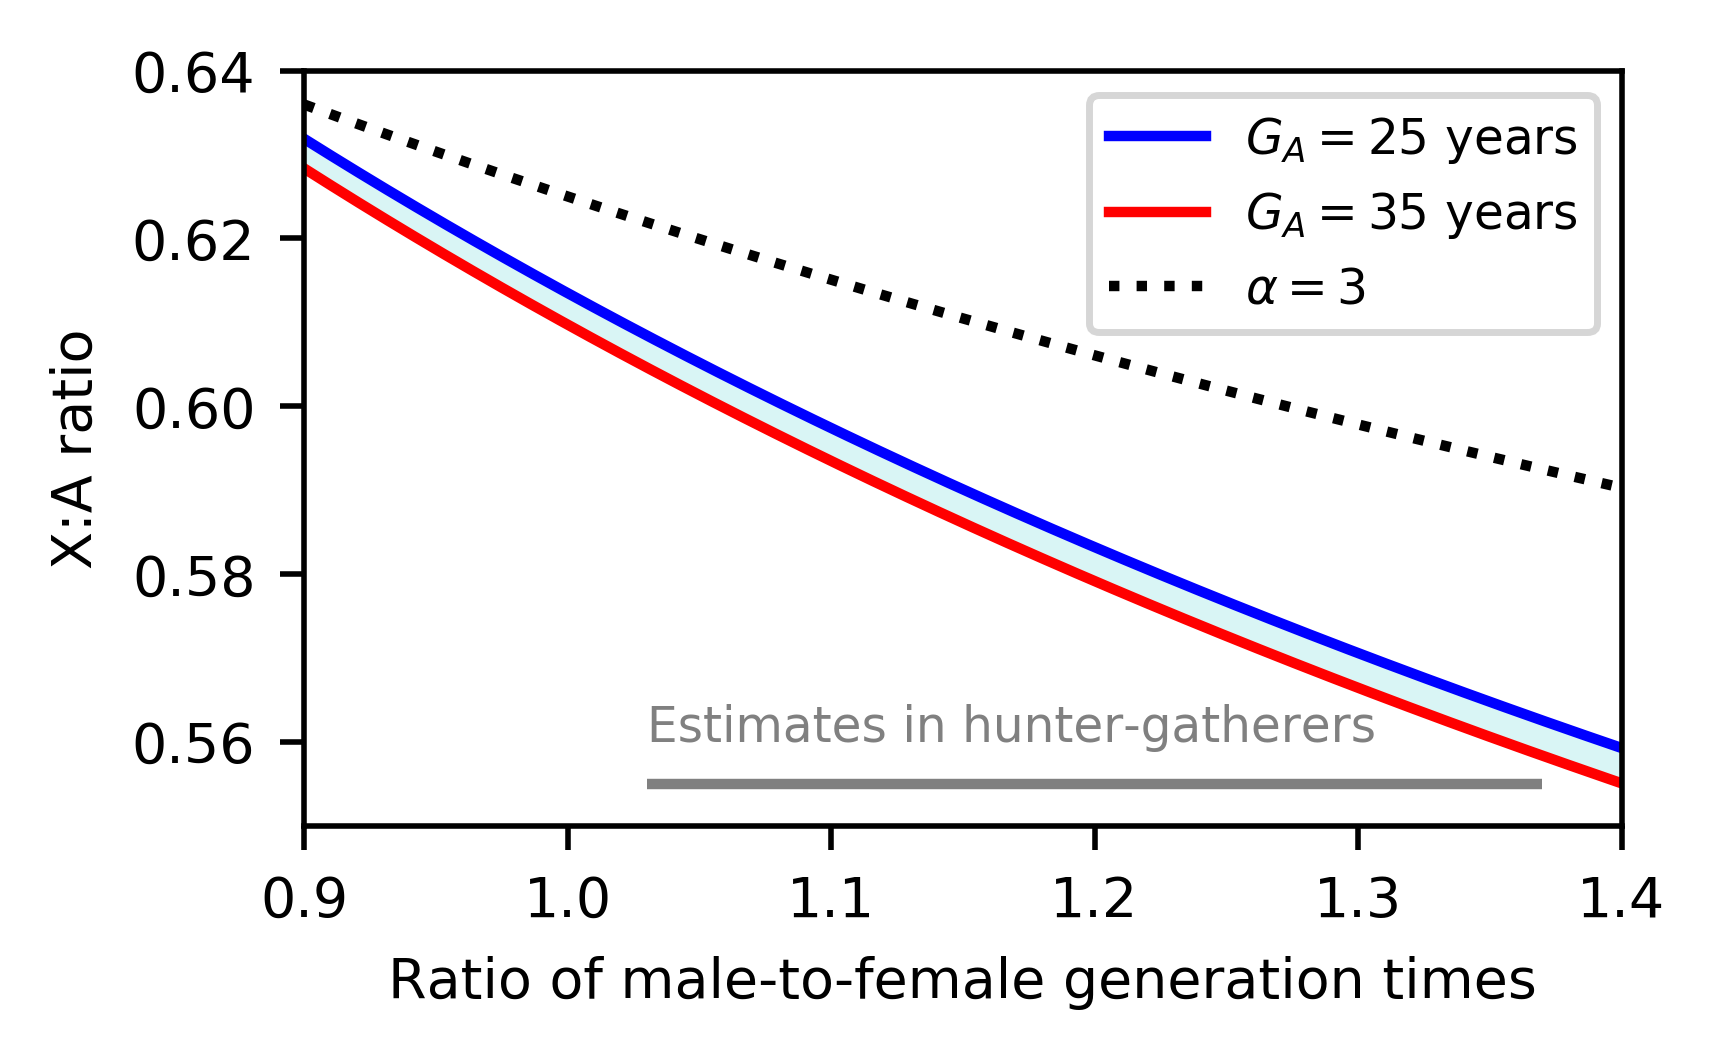

In [17]:
# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8

minGR, maxGR = .9, 1.4
X1 = np.arange(minGR, maxGR, 0.001*(maxGR-minGR))
plt.figure(figsize=(3.4,2)) 
plt.xlabel('Ratio of male-to-female generation times')
plt.ylabel('X:A ratio')
plt.gca().set_xlim([minGR,maxGR])
plt.gca().set_ylim([.55,.64])

u = mutClass(1.51,0.37,6.05,3.61)

def f_(x):
    return (2.0*x+4.0)/(3.0*x+3.0)

y = [[u.polAlt(GA,GR) for GR in X1] for GA in [25,35]]
plt.fill_between(X1, y[0], y[1],facecolor='c', alpha=0.15) 
plt.plot(X1, y[0], label=r'$G_A = 25$ years', color='b' )
plt.plot(X1, y[1], label=r'$G_A = 35$ years', color='r' )
plt.plot(X1, [0.75*f_(x)*f_(3) for x in X1],color='black', linestyle=':',label=r'$\alpha=3$')

plt.errorbar(0.5*(1.37+1.03), 0.555, xerr=0.5*(1.37-1.03), color='gray')
plt.text(1.03,0.56,'Estimates in hunter-gatherers',fontsize=7,color='gray')

plt.legend(fontsize=7)
#plt.text(1.2,0.585,r'$G_A = 25$',fontsize=7,color='b')
#plt.text(1.08,0.58,r'$G_A = 35$',fontsize=7,color='r')
#plt.text(1.3,0.60,r'$\alpha = 3$',fontsize=7,color='black')


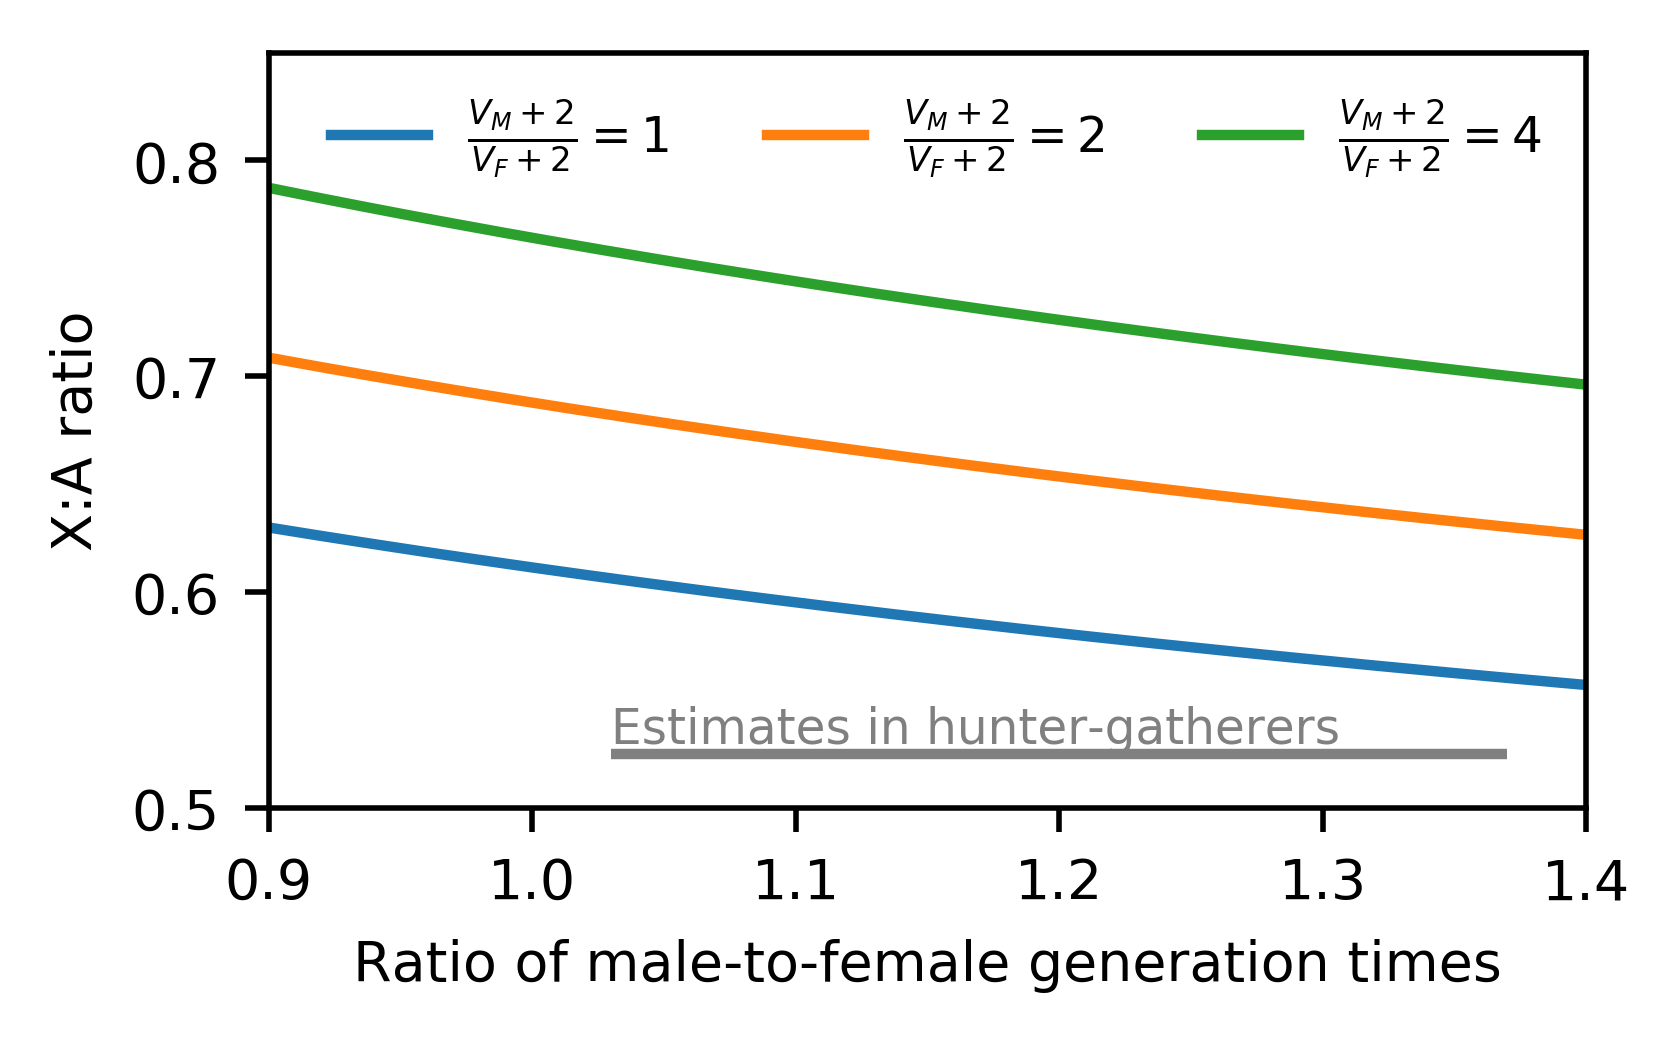

In [9]:
# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8

minGR, maxGR = .9, 1.4
X1 = np.arange(minGR, maxGR, 0.001*(maxGR-minGR))
plt.figure(figsize=(3.4,2)) 
plt.xlabel('Ratio of male-to-female generation times')
plt.ylabel('X:A ratio')
plt.gca().set_xlim([minGR,maxGR])
plt.gca().set_ylim([.5,.85])

u = mutClass(1.51,0.37,6.05,3.61)

def f_(x):
    return (2.0*x+4.0)/(3.0*x+3.0)

for vr in [1,2,4]:
    plt.plot(X1, [u.polAlt(30.0,GR)/f_(vr) for GR in X1], label=r'$\frac{V_M+2}{V_F+2}=%d$'%vr)

plt.errorbar(0.5*(1.37+1.03), 0.525, xerr=0.5*(1.37-1.03), color='gray')
plt.text(1.03,0.53,'Estimates in hunter-gatherers',fontsize=7,color='gray')
plt.tick_params(top=False, right=False)
plt.legend(fontsize=7,loc='upper right',ncol=3, bbox_to_anchor=[1.0, 1.0],frameon=False)
#plt.text(1.2,0.585,r'$G_A = 25$',fontsize=7,color='b')
#plt.text(1.08,0.58,r'$G_A = 35$',fontsize=7,color='r')
#plt.text(1.3,0.60,r'$\alpha = 3$',fontsize=7,color='black')


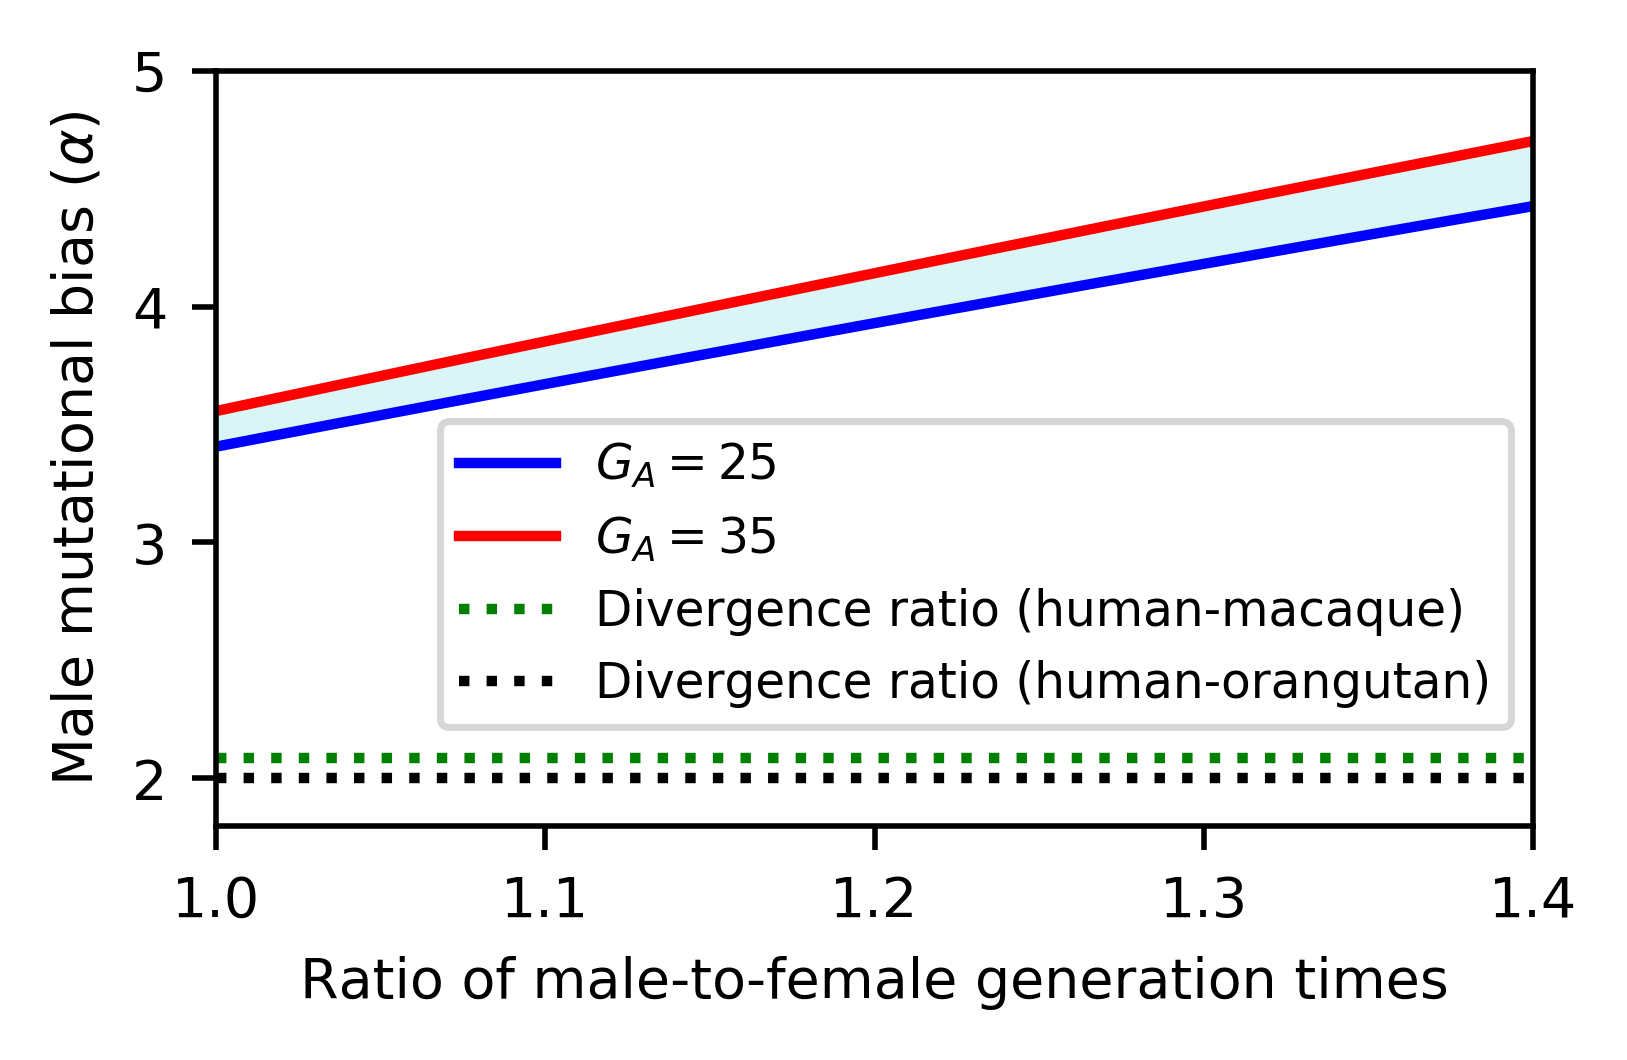

In [10]:

minGR, maxGR = 1.0, 1.4
X1 = np.arange(minGR, maxGR, step=0.0001*(maxGR-minGR))

plt.figure(figsize=(3.4,2)) 
plt.xlabel('Ratio of male-to-female generation times')
plt.ylabel(r'Male mutational bias ($\alpha$)')
plt.gca().set_xlim([minGR,maxGR])
plt.gca().set_ylim([1.8,5])

u = mutClass(1.51,0.37,6.05,3.61) # mutClass(1.41,0.39,5.5,2.04) ?
 

y = [[u.alphaAlt(GA,GR) for GR in X1] for GA in [25,35]]
plt.fill_between(X1, y[0], y[1],facecolor='c', alpha=0.15) 
plt.plot(X1, y[0], label=r'$G_A = 25$', color='b' )
plt.plot(X1, y[1], label=r'$G_A = 35$', color='r' )
plt.axhline(y=2.087, color='green', linestyle=':',label='Divergence ratio (human-macaque)')
plt.axhline(y=2, color='black', linestyle=':',label='Divergence ratio (human-orangutan)')

plt.legend(fontsize=7,loc=(.17,.13))


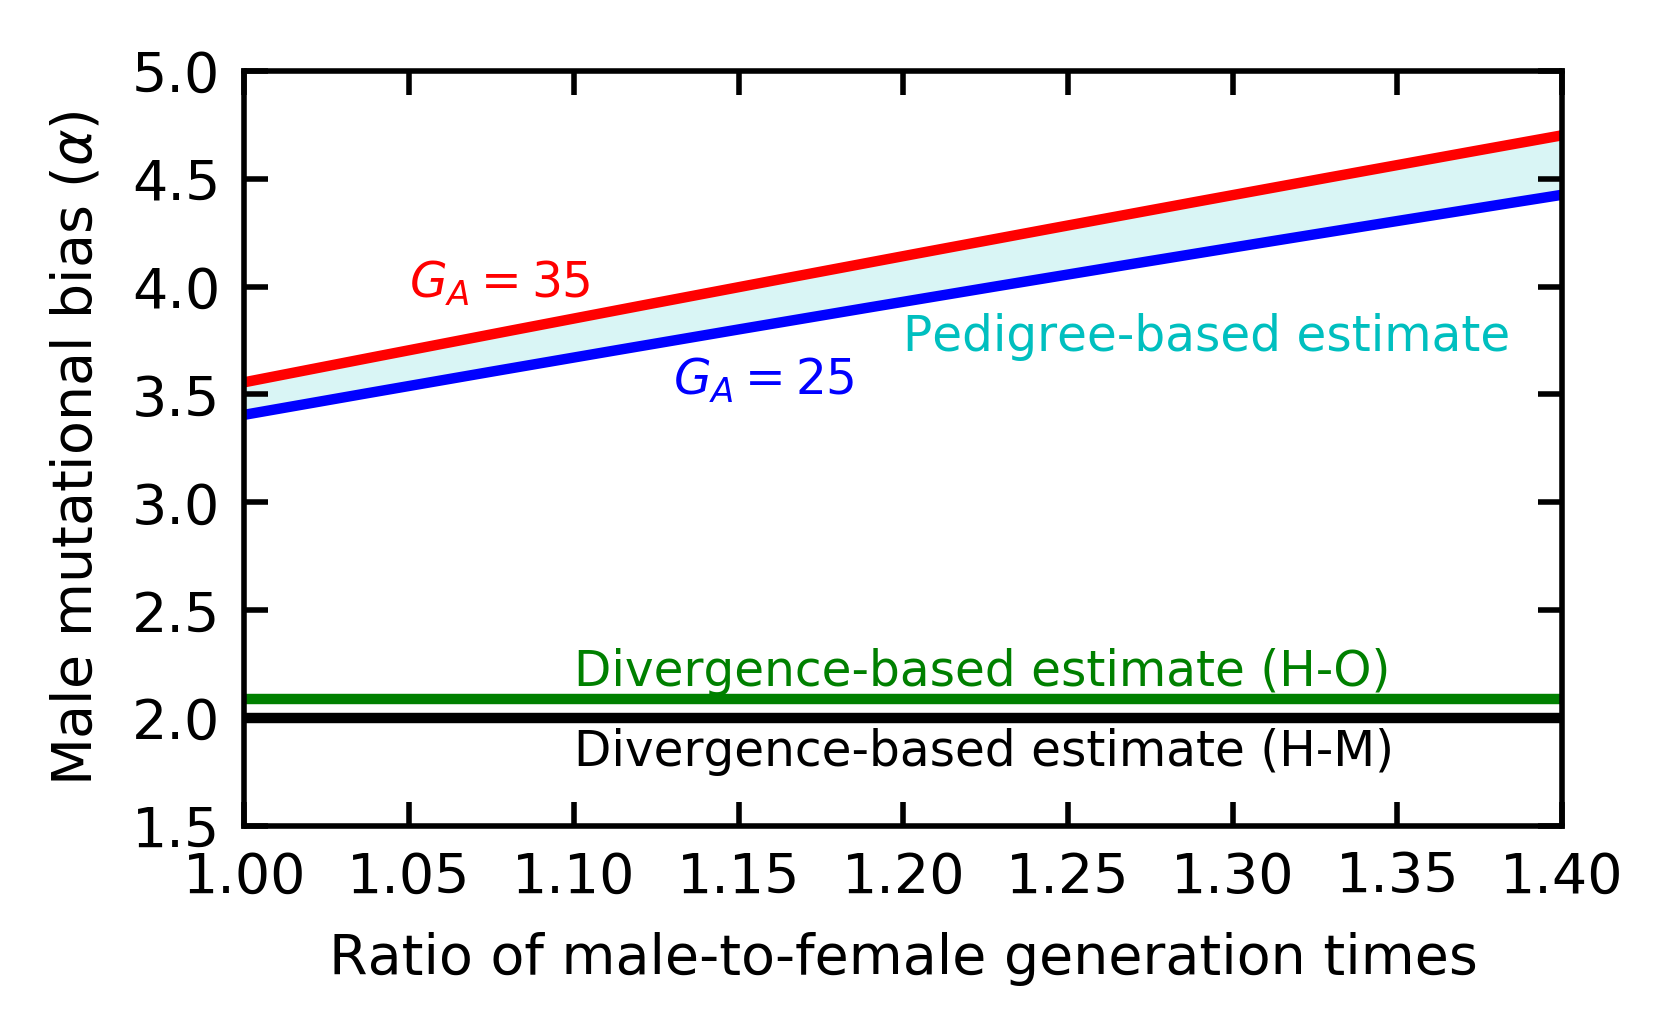

In [31]:

minGR, maxGR = 1.0, 1.4
X1 = np.arange(minGR, maxGR, step=0.0001*(maxGR-minGR))

plt.figure(figsize=(3.4,2))


plt.xlabel('Ratio of male-to-female generation times')
plt.ylabel(r'Male mutational bias ($\alpha$)')
plt.gca().set_xlim([minGR,maxGR])
plt.gca().set_ylim([1.5,5])

u = mutClass(1.51,0.37,6.05,3.61) # mutClass(1.41,0.39,5.5,2.04) ?
 

y = [[u.alphaAlt(GA,GR) for GR in X1] for GA in [25,35]]
plt.fill_between(X1, y[0], y[1],facecolor='c', alpha=0.15) 
plt.plot(X1, y[0], label=r'$G_A = 25$', color='b' )
plt.plot(X1, y[1], label=r'$G_A = 35$', color='r' )
plt.axhline(y=2.087, color='green', linestyle='-',label='Human-macaque divergence ratio')
plt.axhline(y=2, color='black', linestyle='-',label='Human-orangutan divergence ratio')

plt.text(1.13,3.5,r'$G_A = 25$',fontsize=7,color='b')
plt.text(1.05,3.95,r'$G_A = 35$',fontsize=7,color='r')
plt.text(1.2,3.7,'Pedigree-based estimate',fontsize=7,color='c')
plt.text(1.1,1.78,'Divergence-based estimate (H-M)',fontsize=7,color='black')
plt.text(1.1,2.15,'Divergence-based estimate (H-O)',fontsize=7,color='green')

plt.yticks(np.linspace(1.5,5,8))
plt.xticks(np.linspace(1.00,1.40,9))
plt.tick_params(direction='in')
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.savefig('Data_Fig_3.pdf', bbox_inches="tight")
